In [70]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('npadata.csv')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
pd.options.display.max_rows = 999

#firstly, going to remove physicians from the dataset
nps = df[df.degree != 'physician specialist']

#df1 = just country, requirements, duration
df1 = nps[['country', 'requirements', 'degree', 'duration']]

#d1 is the full dataset with the missing rows removed
d1 = nps[(nps.duration.isnull()==False) & (nps.requirements.isnull()==False) & (nps.degree.isnull()==False)].sort_values('country')


# How to use this

Read it like a page from top to bottom. Each survey question has its own analysis, beginning with words in bold. 

Questions about the data set that we still need to address are marked with the hashtag <u><b>#fu</b></u>, just search the page for this.

Here are the parts of this notebook:

<ul>
    <li> <a href=#unique>How many different programs are in the dataset?</a>
    <li> <a href=#requirements>What are the different NPA program entry requirements?</a>
    <li> <a href=#degree>What degrees are awarded by the NPA programs?</a>
    <li> <a href=#duration>What is the duration of NPA programs?</a>
    <li> <a href=#guidelines>Are there any institutions that set practice guidelines?</a>
    <li> <a href=#exam>Is there a standardized exam that graduates must pass in order to practice?</a>
    <li> <a href=#tsratio>What is the ratio of trainees to supervisors in the operating room?</a>
    <li> <a href=#curricbyphys>How much of the curriculum is taught by physicians?</a>
    <li> <a href=#npagrads>How many graduates of this NPA program are there each year?</a>

# First, let's have a look at the data
Here we have it sorted by country

In [2]:
df1

,country,requirements,degree,duration
0,Uganda,"diploma in nursing, midwifery or clinical medi...",Advanced Diploma,24.0
1,Congo (Brazzaville),Nursing diploma,Assistant sanitaire en anesthésie-réanimation,24.0
2,DRC,Other,Autre,9.0
3,Burundi,Secondary school,Bachelor's degree,48.0
4,Ethiopia,Nursing diploma,Bachelor's degree,48.0
5,Ethiopia,Secondary school,Bachelor's degree,48.0
6,Ethiopia,Secondary school,Bachelor's degree,48.0
7,Ethiopia,Secondary school,Bachelor's degree,48.0
8,Ethiopia,NaN,Bachelor's degree,NaN
9,Ethiopia,NaN,Bachelor's degree,NaN


It appears there are 127 possible separate programs

# How many have blanks in the core categories of requirements, duration, or degree?

These are the entries with something missing:

In [3]:
missing = df1[(nps['duration'].isnull()==True) | (nps['requirements'].isnull()==True) | (nps['degree'].isnull()==True)].sort_values('country')
missing

,country,requirements,degree,duration
80,Burundi,NaN,Licence,NaN
110,Chad,NaN,NaN,NaN
8,Ethiopia,NaN,Bachelor's degree,NaN
9,Ethiopia,NaN,Bachelor's degree,NaN
10,Gambia,Nursing diploma,Bachelor's degree,NaN
111,Ghana,NaN,NaN,NaN
113,Kenya,NaN,NaN,NaN
112,Kenya,NaN,NaN,NaN
114,Kenya,NaN,NaN,NaN
115,Malawi,NaN,NaN,NaN


In [4]:
missingnum = missing['country'].count()
print('There are ', missingnum, 'rows with missing core elements')

There are  24 rows with missing core elements


# Therefore, there are 24 entries with missing elements
### Let's drop them from the database, the new database is df2

In [5]:
df2 = df1[(nps.duration.isnull()==False) & (nps.requirements.isnull()==False) & (nps.degree.isnull()==False)].sort_values('country')
print('There are', df2.country.nunique(), 'unique countries in the dataset')

There are 34 unique countries in the dataset


In [6]:
df2.sort_values('country')

,country,requirements,degree,duration
33,Angola,Nursing diploma,Diploma,36.0
87,Benin,Nursing diploma,Master's degree,24.0
34,Benin,Diploma,Diploma,72.0
86,Benin,Nursing diploma,Master's degree,24.0
85,Benin,Nursing diploma,Master's degree,36.0
35,Botswana,Nursing degree,Diploma,12.0
37,Burkina Faso,Nursing diploma,Diploma,24.0
36,Burkina Faso,Nursing degree,Diploma,24.0
39,Burkina Faso,Nursing diploma,Diploma,24.0
38,Burkina Faso,Nursing diploma,Diploma,24.0


### There are 34 countries represented in the final dataset:

In [7]:
df2.country.nunique() # gives number of unique countries

34

# <u> <a name='unique'>Unique programs</u></a>
### Any degree that has two different durations means we have a duplicate response, and we'll need to sort out which one we trust.
For example, in Benin, the data suggests that you can enter with a nursing diploma, and get a master's degree, with two different program durations.

In [8]:
df2.groupby(['country', 'requirements','degree','duration']).count()

Empty DataFrame
Columns: []
Index: [(Angola, Nursing diploma, Diploma, 36.0), (Benin, Diploma, Diploma, 72.0), (Benin, Nursing diploma, Master's degree, 24.0), (Benin, Nursing diploma, Master's degree, 36.0), (Botswana, Nursing degree, Diploma, 12.0), (Burkina Faso, Nursing degree, Diploma, 24.0), (Burkina Faso, Nursing diploma, Diploma, 24.0), (Burundi, Nursing diploma, Diploma, 36.0), (Burundi, Secondary school, Bachelor's degree, 48.0), (Cameroon, Nursing degree, Diploma, 24.0), (Cameroon, Nursing diploma, Diploma, 24.0), (Central African Republic, Nursing diploma, Master's degree, 24.0), (Congo (Brazzaville), Nursing diploma, Assistant sanitaire en anesthésie-réanimation, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 36.0), (DRC, Nursing diploma, Diploma, 36.0), (DRC, Other, Autre, 9.0), (Eritrea, Nursing diploma, Diploma, 36.0), (Ethiopia, Bachelor's degree, Master's degree, 24.0), (Ethiopia, Nursing diploma, Bachelor's degree, 48.0), (Ethiopia, Nursing diploma, Certificate, 12.0), (Ethiopia, Secondary school, Bachelor's degree, 48.0), (Gabon, Nursing degree, Certificate, 36.0), (Gabon, Nursing diploma, Master's degree, 36.0), (Ghana, Advanced diploma anesthesia, Bachelor's degree, 24.0), (Ghana, Nursing degree, Bachelor's degree, 24.0), (Ghana, Nursing diploma, Diploma, 24.0), (Kenya, Diploma in clinical medicine, Diploma, 18.0), (Kenya, Nursing degree, I don't know, 24.0), (Kenya, Nursing diploma, Diploma, 18.0), (Liberia, Nursing diploma, Diploma, 24.0), (Liberia, Other, Diploma, 24.0), (Madagascar, Secondary school, Bachelor's degree, 36.0), (Malawi, Nursing diploma, Diploma, 18.0), (Malawi, Other, Diploma, 36.0), (Mozambique, Nursing diploma, Bachelor's degree, 24.0), (Niger, Nursing diploma, Licence, 36.0), (Nigeria, Nursing degree, Certificate, 18.0), (Nigeria, Nursing degree, Diploma, 18.0), (Nigeria, Nursing diploma, Certificate, 24.0), (Nigeria, Nursing diploma, Diploma, 18.0), (Rwanda, Nursing diploma, Bachelor's degree, 48.0), (Rwanda, Secondary school, Bachelor's degree, 48.0), (Senegal, Nursing diploma, Diploma, 24.0), (Sierra Leone, Diploma, Diploma, 18.0), (Sierra Leone, Nursing degree, Diploma, 18.0), (Sierra Leone, Nursing diploma, Diploma, 18.0), (Sierra Leone, nursing certificate, State enrolled community health nurse SECHN,, Certificate, 12.0), (Somaliland, Nursing degree, Bachelor's degree, 18.0), (Somaliland, Nursing degree, Bachelor's degree, 24.0), (Somaliland, Nursing diploma, Bachelor's degree, 2.0), (Somaliland, Previously qualified nurse, midwife or pharmacist, Nurse anesthetist', 18.0), (South Africa, Medical school, Diploma, 6.0), (South Sudan, Nursing diploma, Diploma, 24.0), (Sudan, Secondary school, Bachelor's degree, 48.0), (Swaziland, Nursing degree, Bachelor's degree, 24.0), (Tanzania, Assisstant medical officer (general), Diploma, 24.0), (Tanzania, Nursing degree, Certificate, 12.0), (Tanzania, Nursing diploma, Certificate, 12.0), (Tanzania, Nursing diploma, Diploma, 24.0), (Togo, Nursing diploma, Master's degree, 24.0), (Togo, Secondary school, I don't know, 36.0), (Uganda, Nursing diploma, Certificate, 18.0), (Uganda, Nursing diploma, Diploma, 2.5), (Uganda, Nursing diploma, Diploma, 24.0), (Uganda, Nursing diploma, Diploma, 36.0), (Uganda, Other, Diploma, 24.0), (Uganda, diploma in nursing, midwifery or clinical medicine, Advanced Diploma, 24.0), (Uganda, diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia, Bachelor's degree, 48.0), (Zambia, Other, Diploma, 24.0), (Zambia, Secondary school, Diploma, 24.0), (Zimbabwe, Nursing degree, Diploma, 12.0), (Zimbabwe, Nursing diploma, Diploma, 12.0)]

## Here's the same thing again, but easier to identify:
### In the 'duration' column, anything >1 means we have to sort out which program we believe to exist.
It is unlikely that two programs have the same entry requirements, and give the same degree, but have two <i>different</i> durations, right?

In [9]:
uniqueprogs = df2.groupby(['country', 'requirements','degree']).nunique()
uniqueprogs

country  \
country                  requirements                                       degree                                                   
Angola                   Nursing diploma                                    Diploma                                              1   
Benin                    Diploma                                            Diploma                                              1   
                         Nursing diploma                                    Master's degree                                      1   
Botswana                 Nursing degree                                     Diploma                                              1   
Burkina Faso             Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Burundi                  Nursing diploma                                    Diploma                                              1   
                         Secondary school                                   Bachelor's degree                                    1   
Cameroon                 Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Central African Republic Nursing diploma                                    Master's degree                                      1   
Congo (Brazzaville)      Nursing diploma                                    Assistant sanitaire en anesthésie-réanimation        1   
Cote D'Ivoire            Nursing diploma                                    Diploma                                              1   
DRC                      Nursing diploma                                    Diploma                                              1   
                         Other                                              Autre                                                1   
Eritrea                  Nursing diploma                                    Diploma                                              1   
Ethiopia                 Bachelor's degree                                  Master's degree                                      1   
                         Nursing diploma                                    Bachelor's degree                                    1   
                                                                            Certificate                                          1   
                         Secondary school                                   Bachelor's degree                                    1   
Gabon                    Nursing degree                                     Certificate                                          1   
                         Nursing diploma                                    Master's degree                                      1   
Ghana                    Advanced diploma anesthesia                        Bachelor's degree                                    1   
                         Nursing degree                                     Bachelor's degree                                    1   
                         Nursing diploma                                    Diploma                                              1   
Kenya                    Diploma in clinical medicine                       Diploma                                              1   
                         Nursing degree                                     I don't know                                         1   
                         Nursing diploma                                    Diploma                                              1   
Liberia                  Nursing diploma                                    Diploma                    

## here is the same thing, except with a total at the bottom. As you can see, there are 79 unique pathways (requirement/degree pairs), but 84 durations... so 10 duplicates we still have to sort out

In [10]:
uniqueprogs.loc['total'] = uniqueprogs.sum()
uniqueprogs

,country,requirements,degree,duration
"(Angola, Nursing diploma, Diploma)",1,1,1,1
"(Benin, Diploma, Diploma)",1,1,1,1
"(Benin, Nursing diploma, Master's degree)",1,1,1,2
"(Botswana, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Secondary school, Bachelor's degree)",1,1,1,1
"(Cameroon, Nursing degree, Diploma)",1,1,1,1
"(Cameroon, Nursing diploma, Diploma)",1,1,1,1


# How many NPA programs are in each country?
### response to survey question 'How many NPA programs are in your country?' We didn't ask this in the follow up surveys, I'm inclined to leave it out (especially because it conflicts with itself).

<br>Each represents one survey response... for insance in Burundi, 1 person said there is 1 training program, and 2 people said there were 3 training programs. 

In [11]:
npapgms = nps[['country', 'npaprograms']]
pd.crosstab(npapgms['country'], npapgms['npaprograms'])

npaprograms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,17.0,19.0,31.0,500.0
country,,,,,,,,,,,,,,
Angola,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Benin,0,4,0,0,0,0,0,0,0,0,0,0,0,0
Botswana,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Burkina Faso,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Burundi,0,1,0,2,0,0,0,0,0,0,0,0,0,0
Cameroon,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Congo (Brazzaville),0,1,0,0,0,0,0,0,0,0,0,0,0,0
Cote D'Ivoire,0,2,0,0,0,0,0,0,0,0,0,0,0,0
DRC,0,1,1,0,0,0,0,0,0,0,0,0,0,0


# <u> <a name='requirements'>Entry requirements </u></a>

### It appears that, by far, most programs are nursing diploma entry. From quick googling, even a nursing diploma is often 3 years long.

> ### for data cleaning, we need to consolidate these into fewer categories. #fu

In [12]:
reqs = df2.requirements.value_counts()
reqspct = df2.requirements.value_counts(normalize=True)

In [13]:
reqstab = pd.concat([reqs, reqspct], axis=1)
reqstab

,requirements,requirements
Nursing diploma,46,0.534884
Nursing degree,15,0.174419
Secondary school,9,0.104651
Other,5,0.058140
Diploma,2,0.023256
Diploma in clinical medicine,1,0.011628
"diploma in nursing, midwifery or clinical medicine",1,0.011628
"diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia",1,0.011628
Assisstant medical officer (general),1,0.011628
"nursing certificate, State enrolled community health nurse SECHN,",1,0.011628


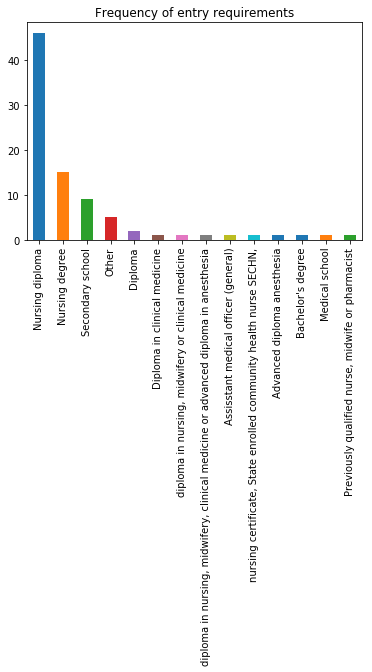

In [14]:
reqs.plot.bar(title='Frequency of entry requirements')

# <u> <a name='degree'>Degrees awarded </u></a>
### Again, it appears that diplomas are far more likely to be awarded.
> ### We need to collapse these down into fewer categories as well #fu

In [15]:
degs = df2['degree'].value_counts()
degspct = df2['degree'].value_counts(normalize=True)
degstab = pd.concat([degs, degspct], axis=1)
degstab.columns = ('count', 'percent')
degstab

,count,percent
Diploma,43,0.500000
Bachelor's degree,17,0.197674
Certificate,9,0.104651
Master's degree,7,0.081395
Licence,4,0.046512
I don't know,2,0.023256
Nurse anesthetist',1,0.011628
Advanced Diploma,1,0.011628
Assistant sanitaire en anesthésie-réanimation,1,0.011628
Autre,1,0.011628


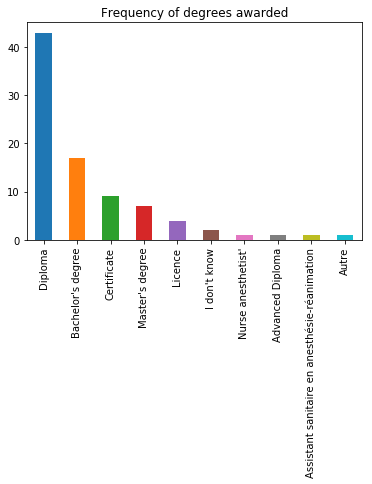

In [16]:
degs.plot.bar(title="Frequency of degrees awarded")

# <u><a name='duration'>Duration </u></a>

## Duration by program

## 75% of programs are 36 months or less

With a mean duration of 26 months.

In [17]:
df1.describe()

,duration
count,88.000000
mean,25.857955
std,12.223717
min,2.000000
25%,18.000000
50%,24.000000
75%,36.000000
max,72.000000


Text(0.5,1,'Mean, median, IQR, and range of duration')

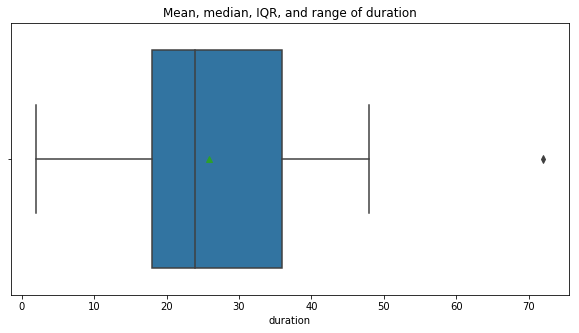

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(x=df1['duration'], showmeans=True).set_title("Mean, median, IQR, and range of duration")

### The next three figures show that most programs are 30 months or less

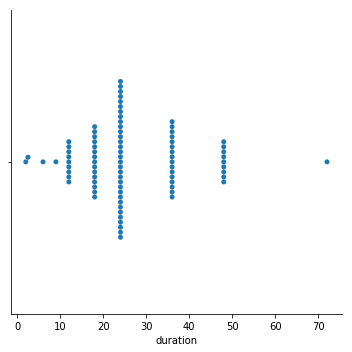

In [172]:
sb.catplot(x='duration', data=d1, kind='swarm')

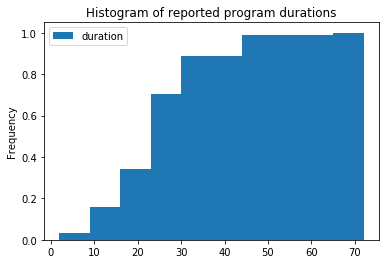

In [121]:
df1.plot.hist(density=True, cumulative=True, title="Histogram of reported program durations")

Text(0.5,1,'Histogram of reported program durations')

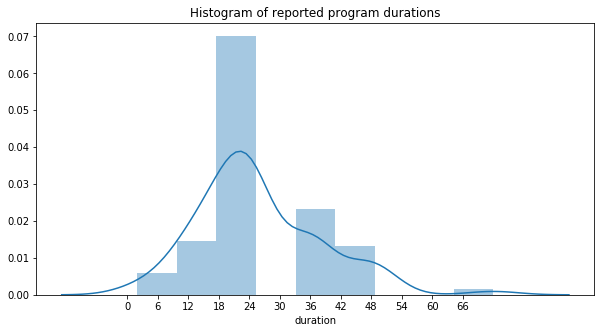

In [138]:
#df1['duration'].plot.hist(cumulative=True, title="Cumulative proportion of program durations")
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticks(range(0,70,6))
sb.distplot(df1['duration'].dropna()).set_title('Histogram of reported program durations')

## Bachelors/License have the highest mean duration of training, at 36 months. 

> ### why does bachelors have a higher mean duration than bachelors? #fu

In [20]:
durdegree = df1.groupby('degree').mean().sort_values('duration')
durdegree

,duration
degree,
Autre,9.000000
Certificate,17.333333
Nurse anesthetist',18.000000
Diploma,23.500000
Advanced Diploma,24.000000
Assistant sanitaire en anesthésie-réanimation,24.000000
I don't know,24.000000
Master's degree,27.428571
Bachelor's degree,35.764706


## But no trends can be drawn

The data is too sparse to draw a conclusion

Text(0.5,1,'Duration of training by degree given')

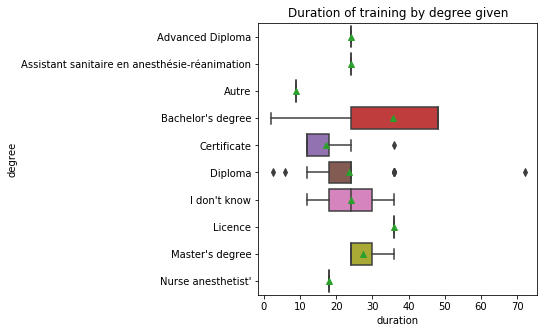

In [143]:
fig, ax = plt.subplots(figsize=(5,5))
sb.boxplot(ax=ax, x=df1['duration'], y=df1['degree'], showmeans=True).set_title("Duration of training by degree given")

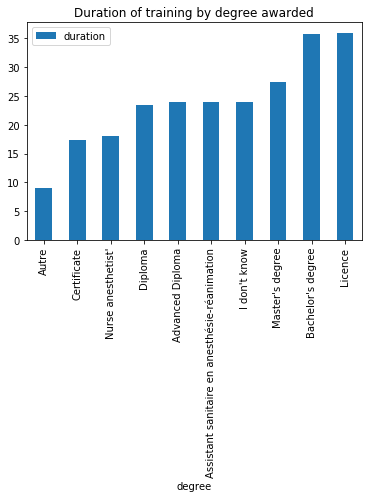

In [21]:
durdegree.plot.bar(title="Duration of training by degree awarded")

# <a name='guidelines'>Survey question: "Is there an association that sets practice guidelines in your country?"</a>

### There is some conflicting information, but mostly respondents from a certain country agree with themselves

In [145]:
guideline = pd.crosstab(d1['country'],d1['practice-guideline-org'])
guideline.loc['total'] = guideline.sum()
guideline

practice-guideline-org,I don't know,No,Yes
country,,,
Angola,0,1,0
Benin,0,0,3
Burkina Faso,0,1,0
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0
Ethiopia,0,0,3


In [146]:
def f(row):
    if row['Yes'] >= 1:
        val = 'Yes'
    elif row['No'] >= 1:
        val = 'No'
    else:
        val = 'I do not know'
    return val

guideline['Practice guideline'] = guideline.apply(f, axis=1)
guideline = guideline['Practice guideline']
guideline = guideline.drop(guideline.index[-1])

## Assume that if <i>anyone</i> in the country says 'yes', then it's true
<br> That leaves us with 46% of countries saying 'yes, there is an association that sets guidelines'

In [147]:
guideline.value_counts(normalize=True)

No     0.538462
Yes    0.461538
Name: Practice guideline, dtype: float64

# <a name='exam'>Survey question: "Is there a standardized exam that must be taken before they can practice?"</a>

## again, there seems to be some internal disagreement where different respondents from the same country don't agree

In [25]:
stdexam = pd.crosstab(d1['country'], d1['standardizedexam'])
stdexam

standardizedexam,I don't know,No,Yes
country,,,
Angola,0,0,1
Benin,0,1,2
Burkina Faso,0,0,1
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0
Ethiopia,0,1,2


## Using the same method where if ANYONE in the country says yes it = yes, then 54% say they have a standardized exam that must be passed.

In [26]:
def f(row):
    if row['Yes'] >= 1:
        val = 'Yes'
    elif row['No'] >= 1:
        val = 'No'
    else:
        val = 'I do not know'
    return val

stdexam['Standardized exam'] = stdexam.apply(f, axis=1)
stdexam = stdexam['Standardized exam']
stdexam.value_counts(normalize=True)

Yes    0.538462
No     0.461538
Name: Standardized exam, dtype: float64

# <a name='tsratio'>What is the ratio of trainees to supervisors (in the operating room?)</a>

## Mean trainee supervisor ratio

The mean number of trainees per supervisor in the OR is 2.85, but with a wide standard deviation.

Conclusion: I'm not sure what to report about this, because I feel it is a fairly gross under representation. I think this might be a the number of trainees <i>per cadre</i> meaning, that a supervisor might have 2 MMeds, 2 NPAs, and others.

In [29]:
d1['trainee-supervisor'].describe()

count    31.000000
mean      2.850440
std       2.547921
min       0.363636
25%       2.000000
50%       2.000000
75%       3.000000
max      15.000000
Name: trainee-supervisor, dtype: float64

Text(0.5,1,'Distribution of trainee supervisor ratios')

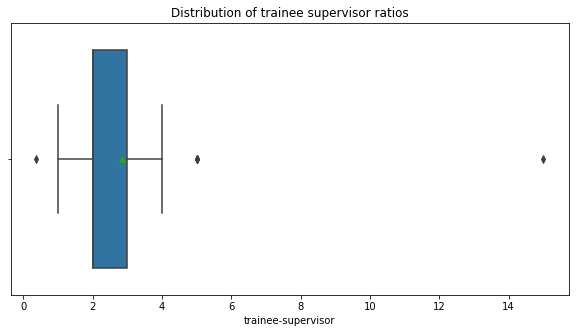

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(d1['trainee-supervisor'], showmeans=True).set_title("Distribution of trainee supervisor ratios")

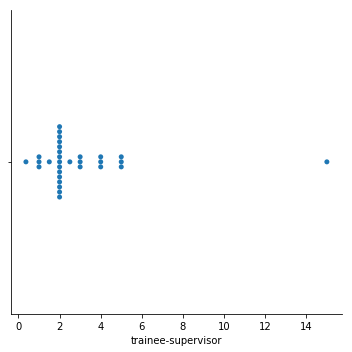

In [193]:
sb.catplot(x='trainee-supervisor', data=d1, kind="swarm", height=5)

## Trainee ratio by degree awarded

Too hard to tell, too much distribution.

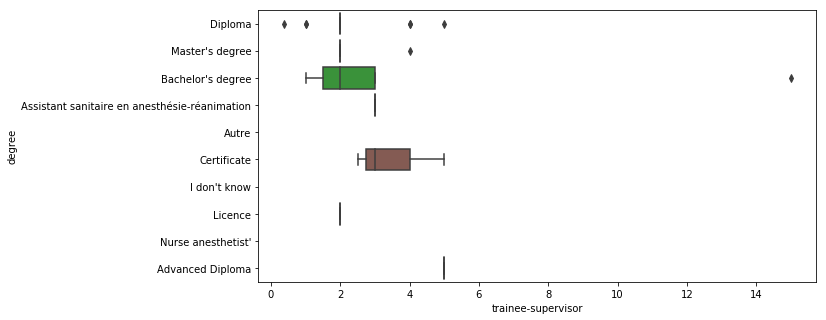

In [157]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(x=d1['trainee-supervisor'], y=d1['degree'])

## Is there an association between program duration and supervisor ratio?

Doesn't look like much to me!

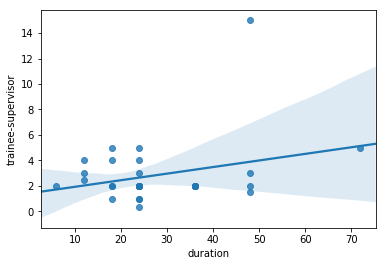

In [175]:
sb.regplot(x='duration', y='trainee-supervisor', data=d1, fit_reg=True)

# <a name='curricbyphys'>How much of the curriculum is taught by physicians?</a>

In [220]:
# First, let's merge the categories 0 and 1-50, into <50%
def curric(series):
    if series == ">50%":
        return ">50%"
    else:
        return "<50%"

d1['currphys'] = d1['curriculum_physicians'].apply(curric)

## Physicians seem to be heavily involved in almost half the programs

In [221]:
d1['currphys'].value_counts(normalize=True)

<50%    0.55814
>50%    0.44186
Name: currphys, dtype: float64

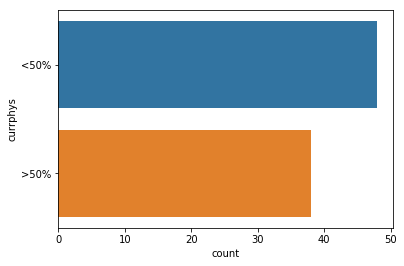

In [222]:
sb.countplot(y='currphys', data=d1)

## Are physicians involved in some degrees, and not others?

Perhaps more involved with Master's degrees, but not bachelors?

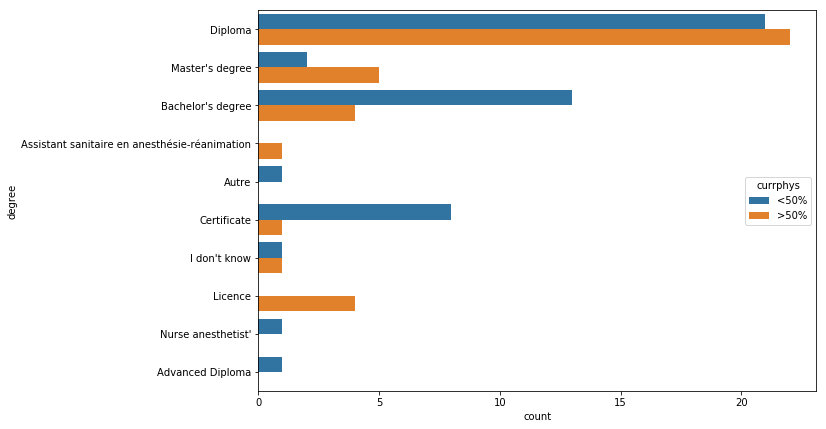

In [233]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='currphys', y='degree', data=d1)

# <a name='npagrads'>How many graduates of this NPA program are there each year?</a>

In [262]:
d1['npagrads'].describe()

count     77.000000
mean      44.870130
std       90.300864
min        0.000000
25%       10.000000
50%       20.000000
75%       40.000000
max      700.000000
Name: npagrads, dtype: float64

In [263]:
d1['npagrads'].quantile(0.95) #the distribution is too huge, let's only take the 95% percentile and get rid of those crazy outliers

168.0000000000001

In [268]:
npachopped = d1[['npagrads'] <= 168]

TypeError: '<=' not supported between instances of 'list' and 'int'

The standard deviation is 90!!

In [259]:
sb.catplot(x='npagrads', data=npachopped, kind='swarm')

ValueError: Could not interpret input 'npagrads'

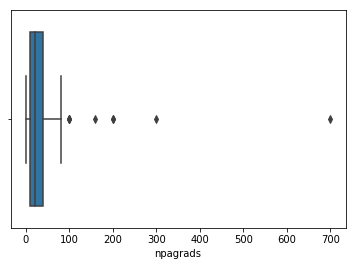

In [242]:
sb.boxplot(d1['npagrads'])

# Skills

# Physician analysis (tbd)